In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


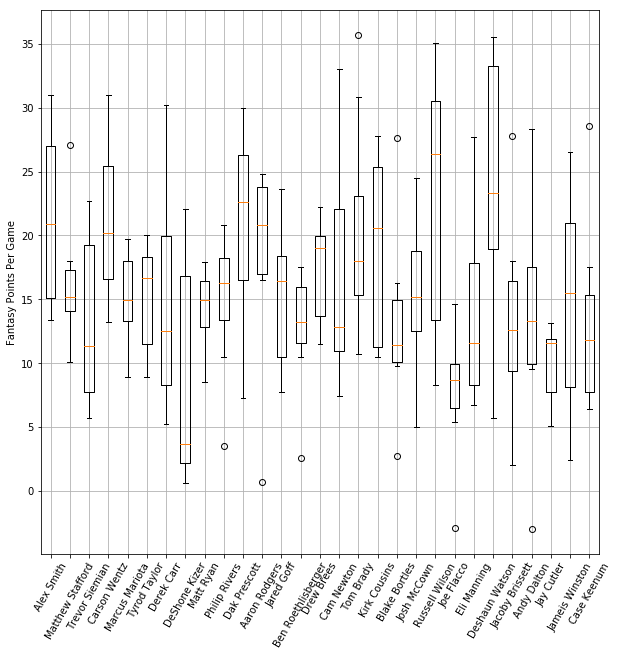

In [3]:
df = pd.read_excel(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\Capstone\FFstats.xlsx', sheetname = 'season')
#loads data for every FP all QBs in the league by game
player = df['Player'].unique()
non_relevant_player = [2, 17, 22, 27, 29, 30, 31, 32, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
relevant_player = np.delete(player, non_relevant_player)
#choosing specific players to put into the boxplot below that I personally 
#decided based on name recognition alone
datap = []
for x in relevant_player:
    all_data = df[df['Player'] == x]
    final_data = all_data['Avg']
    datap.append(final_data)
#seperates data from the input data set that includes data for every game by 
#player so that we can graph and add it to tables later
plt.figure(figsize = (10,10))
plt.boxplot(x=datap, labels = (relevant_player))
plt.xticks(rotation=60)
plt.ylabel('Fantasy Points Per Game')
plt.grid()
plt.show()

In [4]:
mean_data = df.groupby('Player').mean()
stdev_data = df.groupby('Player').std()
#takes data organized by week and changes it to by player
col1 = mean_data.loc[:, ['Avg']] 
col2 = stdev_data.loc[:, ['Avg']] 
table = pd.DataFrame(index=player)
table['average FP per game'] = col1
table['standard deviation'] = col2
table.sort_values(by = 'average FP per game', ascending=False)
#seperates the data into the table below

,average FP per game,standard deviation
Deshaun Watson,24.114286,10.754600
Russell Wilson,22.528571,10.766106
Alex Smith,21.325000,7.042067
Carson Wentz,21.100000,6.204607
Dak Prescott,20.785714,8.077217
Tom Brady,20.312500,8.674995
Kirk Cousins,18.871429,7.723927
Aaron Rodgers,17.933333,9.055532
Drew Brees,17.142857,4.262181
Cam Newton,16.637500,9.124056


In [5]:
selector = table['average FP per game'] > 14.63
new_table = table[selector]
new_table.round(2).sort_values(by = 'standard deviation', ascending=False)
#drops players with avg FP/game below 14.63 and reprints

,average FP per game,standard deviation
Russell Wilson,22.53,10.77
Deshaun Watson,24.11,10.75
Jameis Winston,14.64,9.19
Cam Newton,16.64,9.12
Aaron Rodgers,17.93,9.06
Derek Carr,14.90,8.95
Tom Brady,20.31,8.67
Dak Prescott,20.79,8.08
Kirk Cousins,18.87,7.72
Alex Smith,21.32,7.04


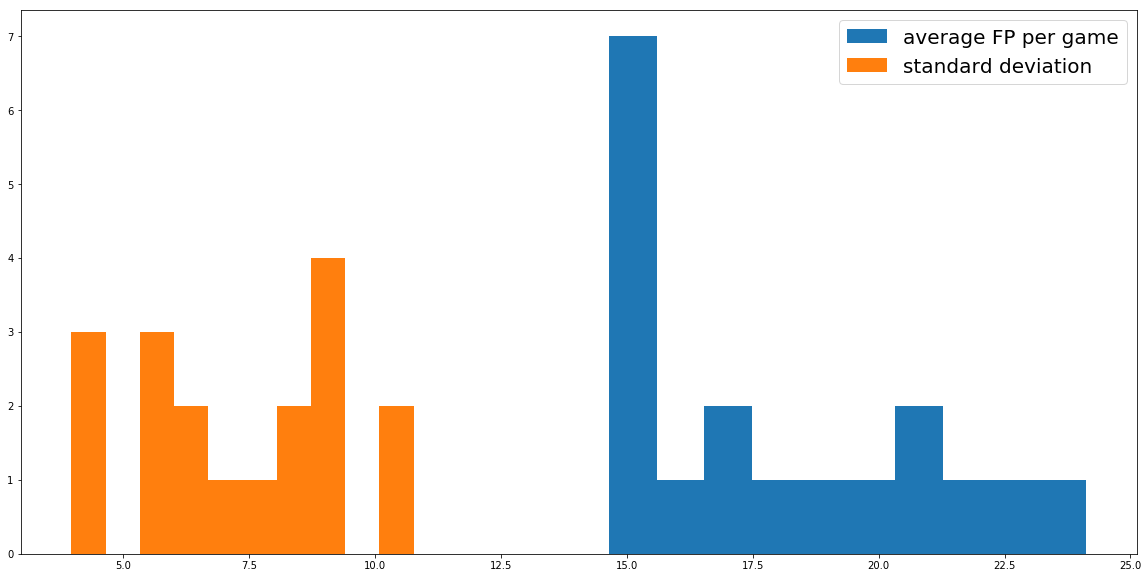

In [6]:
plt.figure(figsize=(20,10))
plt.hist(new_table['average FP per game'], label = 'average FP per game')
plt.hist(new_table['standard deviation'], label = 'standard deviation')
plt.legend(prop={'size': 20})
plt.show()

In [7]:
selector1 = table['standard deviation'] > 6.15 
final_table = table[selector & selector1]
final_player_list = final_table.drop(['Aaron Rodgers'])
final_player_list.round(2).sort_values(by = 'average FP per game', ascending=False)
#drops remainder of players we don't want and the injured aaron rodgers

,average FP per game,standard deviation
Deshaun Watson,24.11,10.75
Russell Wilson,22.53,10.77
Alex Smith,21.32,7.04
Carson Wentz,21.10,6.20
Dak Prescott,20.79,8.08
Tom Brady,20.31,8.67
Kirk Cousins,18.87,7.72
Cam Newton,16.64,9.12
Derek Carr,14.90,8.95
Jameis Winston,14.64,9.19


In [8]:
sf = pd.read_excel(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\Capstone\FFstats.xlsx', sheetname = 'strength')
players = sf['Player']
sf = sf.replace('BYE', np.nan)
#loads defensive data for each week for each player then replaces the BYE 
#weeks with Nan which is easily deleted so there are no errors when combining 
#the sets with the FP per game data from above

In [15]:
my_matchup_data = {}
final_player_list.index
for x in final_player_list.index:
    all_data = sf[sf['Player'] == x]
    final_data = all_data.iloc[0, 2:10]
    selected_data = pd.isnull(final_data)
    my_matchup_data[x] = final_data[~selected_data]
#seperates the data set into a dictionary where every key is a new player
#from the final player list to more easily call when trying to run future
#tests and print graphs

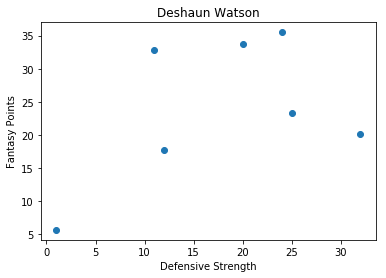

In [10]:
all_players = {}
for x in player:
    all_data = df[df['Player'] == x]
    final_data = all_data['Avg']
    all_players[x] = final_data
plt.scatter(y = all_players['Deshaun Watson'], x = my_matchup_data['Deshaun Watson'])
plt.title("Deshaun Watson")
plt.xlabel("Defensive Strength")
plt.ylabel("Fantasy Points")
plt.show()
#seperates the players from the first data set into a dictionary just like the 
#one from the previous cell. plots defensive strength vs. FP 

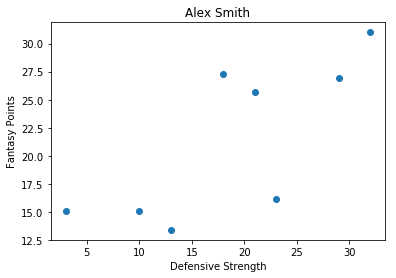

In [11]:
plt.scatter(y = all_players['Alex Smith'], x = my_matchup_data['Alex Smith'])
plt.title("Alex Smith")
plt.xlabel("Defensive Strength")
plt.ylabel("Fantasy Points")
plt.show()

In [12]:
print('Alex Smith')
median_alexsmith = my_matchup_data['Alex Smith'].median()
less_than = my_matchup_data['Alex Smith'] < median_alexsmith
group1 = all_players['Alex Smith'][less_than.values]
group2 = all_players['Alex Smith'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Deshaun Watson')
median_alexsmith = my_matchup_data['Deshaun Watson'].median()
less_than = my_matchup_data['Deshaun Watson'] < median_alexsmith
group1 = all_players['Deshaun Watson'][less_than.values]
group2 = all_players['Deshaun Watson'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Russell Wilson')
median_alexsmith = my_matchup_data['Russell Wilson'].median()
less_than = my_matchup_data['Russell Wilson'] < median_alexsmith
group1 = all_players['Russell Wilson'][less_than.values]
group2 = all_players['Russell Wilson'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Carson Wentz')
median_alexsmith = my_matchup_data['Carson Wentz'].median()
less_than = my_matchup_data['Carson Wentz'] < median_alexsmith
group1 = all_players['Carson Wentz'][less_than.values]
group2 = all_players['Carson Wentz'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Dak Prescott')
median_alexsmith = my_matchup_data['Dak Prescott'].median()
less_than = my_matchup_data['Dak Prescott'] < median_alexsmith
group1 = all_players['Dak Prescott'][less_than.values]
group2 = all_players['Dak Prescott'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Tom Brady')
median_alexsmith = my_matchup_data['Tom Brady'].median()
less_than = my_matchup_data['Tom Brady'] < median_alexsmith
group1 = all_players['Tom Brady'][less_than.values]
group2 = all_players['Tom Brady'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Kirk Cousins')
median_alexsmith = my_matchup_data['Kirk Cousins'].median()
less_than = my_matchup_data['Kirk Cousins'] < median_alexsmith
group1 = all_players['Kirk Cousins'][less_than.values]
group2 = all_players['Kirk Cousins'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Cam Newton')
median_alexsmith = my_matchup_data['Cam Newton'].median()
less_than = my_matchup_data['Cam Newton'] < median_alexsmith
group1 = all_players['Cam Newton'][less_than.values]
group2 = all_players['Cam Newton'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Jameis Winston')
median_alexsmith = my_matchup_data['Jameis Winston'].median()
less_than = my_matchup_data['Jameis Winston'] < median_alexsmith
group1 = all_players['Jameis Winston'][less_than.values]
group2 = all_players['Jameis Winston'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

print('Derek Carr')
median_alexsmith = my_matchup_data['Derek Carr'].median()
less_than = my_matchup_data['Derek Carr'] < median_alexsmith
group1 = all_players['Derek Carr'][less_than.values]
group2 = all_players['Derek Carr'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

#seperates each key from the two dictionaries into top half and bottom half
#of defensive data and tests the corresponding FP against each other

Alex Smith
Ttest_indResult(statistic=-1.5985041579281156, pvalue=0.16106627738079035)
Deshaun Watson
Ttest_indResult(statistic=-1.0808988418305228, pvalue=0.36031059621069084)
Russell Wilson
Ttest_indResult(statistic=-0.9351922648996539, pvalue=0.41745368073175121)
Carson Wentz
Ttest_indResult(statistic=0.21180927113706371, pvalue=0.83927422028293819)
Dak Prescott
Ttest_indResult(statistic=0.54648239729126258, pvalue=0.60823249228833554)
Tom Brady
Ttest_indResult(statistic=0.46470341217771222, pvalue=0.6634315860919624)
Kirk Cousins
Ttest_indResult(statistic=-0.67744582970511136, pvalue=0.53662171084777244)
Cam Newton
Ttest_indResult(statistic=-0.99518009118353534, pvalue=0.35834953665943736)
Jameis Winston
Ttest_indResult(statistic=-0.10127853067851288, pvalue=0.92366553801752582)
Derek Carr
Ttest_indResult(statistic=-1.6881401766537856, pvalue=0.17489992883805477)


In [13]:
selector = table['average FP per game'] > 13
new_table = table[selector].drop(['Aaron Rodgers', 'Sam Bradford', 'Carson Palmer'])
new_table
#bigger list that drops players with season ending injuries

,average FP per game,standard deviation
Alex Smith,21.325000,7.042067
Matthew Stafford,16.428571,5.333452
Trevor Siemian,13.385714,7.129383
Carson Wentz,21.100000,6.204607
Marcus Mariota,15.050000,3.971272
Tyrod Taylor,15.028571,4.356495
Derek Carr,14.900000,8.950978
Matt Ryan,14.257143,3.238239
Philip Rivers,14.900000,5.641428
Dak Prescott,20.785714,8.077217


In [20]:
data_plz = {}
new_table.index
for x in new_table.index:
    all_data = sf[sf['Player'] == x]
    final_data = all_data.iloc[0, 2:10]
    selected_data = pd.isnull(final_data)
    data_plz[x] = final_data[~selected_data]
#loads the def str for all the necessary players into a new dictionary 
mean_defense = {}
stdev_def = {}
for x,y in data_plz.items():
    mean_defense[x] = sum(y)/float(len(y))
#averages the def data for each player 
adj_def = {}
for x,y in mean_defense.items():
    adj_def[x] = 16 / y
#calculates the ADD
new_table['avg def str'] = mean_defense.values()
new_table['adjusted def deviation'] = adj_def.values()
new_table.round(2).sort_values(by = 'average FP per game', ascending=False)
#loads the new data for all the necessary players into a new dictionary 

,average FP per game,standard deviation,avg def str,adjusted def deviation
Deshaun Watson,24.11,10.75,17.86,0.90
Russell Wilson,22.53,10.77,22.43,0.71
Alex Smith,21.32,7.04,18.62,0.86
Carson Wentz,21.10,6.20,20.50,0.78
Dak Prescott,20.79,8.08,20.14,0.79
Tom Brady,20.31,8.67,18.62,0.86
Kirk Cousins,18.87,7.72,21.29,0.75
Drew Brees,17.14,4.26,12.71,1.26
Cam Newton,16.64,9.12,18.38,0.87
Matthew Stafford,16.43,5.33,14.71,1.09
